# Actividad con Datos Textuales

In [146]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("C:/Users/User/Documents/Facu/9216/IOrespuestas.csv")
df

,Marca temporal,Dirección de correo electrónico,Padrón sin números,¿qué es la Investigación Operativa?
0,30/03/2022 17:49:38,pcortif@fi.uba.ar,100723,Se basa en la utilización de métodos analític...
1,30/03/2022 18:00:36,mcirolini@fi.uba.ar,97739,"Optimización y diseño de operaciones, control ..."
2,30/03/2022 18:30:40,rparedes@fi.uba.ar,97920,Aplicaciones de métodos operativos a la vida real
3,30/03/2022 19:20:14,mledesma@fi.uba.ar,102908,La optimización de las operaciones mediante el...
4,30/03/2022 19:20:32,tandrada@fi.uba.ar,100586,Una forma interdisciplinaria de resolver probl...
...,...,...,...,...
116,30/03/2022 21:52:35,jrenovales@fi.uba.ar,103787,Es el area que se encarga de aplicar distintos...
117,30/03/2022 23:07:20,jovillamil@fi.uba.ar,99825,NaN
118,31/03/2022 12:00:41,npesaresi@fi.uba.ar,104911,Aplicación de la ciencia moderna a problemas c...
119,1/04/2022 17:30:14,mjung@fi.uba.ar,102939,No pude completar la encuesta con el celular e...


In [147]:
# SELLECIONO LAS COLUMNS QUE QUIERO Y LES CAMBIO EL NOMBRE

df2=df[['Padrón sin números', '¿qué es la Investigación Operativa?']]
df2.columns = ['padrón', 'texto']
df2

,padrón,texto
0,100723,Se basa en la utilización de métodos analític...
1,97739,"Optimización y diseño de operaciones, control ..."
2,97920,Aplicaciones de métodos operativos a la vida real
3,102908,La optimización de las operaciones mediante el...
4,100586,Una forma interdisciplinaria de resolver probl...
...,...,...
116,103787,Es el area que se encarga de aplicar distintos...
117,99825,NaN
118,104911,Aplicación de la ciencia moderna a problemas c...
119,102939,No pude completar la encuesta con el celular e...


In [148]:
#EJEMPLO

df2['texto'][0]


'Se basa en  la utilización de métodos analíticos para ayudar a tomar mejores decisiones'

# Defino las funciones

In [149]:
# TOKENIZO

def tokens(texto):
    return [ w for w in word_tokenize(str(texto).lower()) if w.isalpha()]

In [150]:
tokens(df2['texto'][0])

['se',
 'basa',
 'en',
 'la',
 'utilización',
 'de',
 'métodos',
 'analíticos',
 'para',
 'ayudar',
 'a',
 'tomar',
 'mejores',
 'decisiones']

In [151]:
# REMUEVO LOS STOP WORDS EN ESPAÑOL

def no_stops(tokens):
    return [t for t in tokens if t not in stopwords.words('spanish')]


In [152]:
no_stops(tokens(df2['texto'][0]))

['basa',
 'utilización',
 'métodos',
 'analíticos',
 'ayudar',
 'tomar',
 'mejores',
 'decisiones']

In [153]:
# Lo transformo en las raices 

wordnet_lematizer = WordNetLemmatizer()
spanish_stemmer = SnowballStemmer('spanish')

def lematizador(texto):
       return [ spanish_stemmer.stem(t) for t in texto ]
    

In [154]:
lematizador(no_stops(tokens(df2['texto'][0])))

['bas', 'utiliz', 'metod', 'analit', 'ayud', 'tom', 'mejor', 'decision']

In [155]:
# JUNTO A TODAS LAS FUNCIONES EN UNA SOLA

funciones = [tokens,no_stops,lematizador]

def preparar(texto):
    tokens = texto 
    for transformar in funciones:
        tokens = transformar(tokens)
    return tokens

In [156]:
# APLICO LA FUNCION A LA COLUMNA TEXTO

df2['texto'] = df2['texto'].apply(preparar)


In [157]:
df2

,padrón,texto
0,100723,"[bas, utiliz, metod, analit, ayud, tom, mejor,..."
1,97739,"[optimiz, diseñ, oper, control, proces, indust..."
2,97920,"[aplic, metod, oper, vid, real]"
3,102908,"[optimiz, oper, mediant, uso, program]"
4,100586,"[form, interdisciplinari, resolv, problem, mul..."
...,...,...
116,103787,"[are, encarg, aplic, distint, metod, oper, ayu..."
117,99825,[nan]
118,104911,"[aplic, cienci, modern, problem, complej, apar..."
119,102939,"[pud, complet, encuest, celul, dia, clas, dij,..."


# Análisis

In [158]:
# DEFINICION DE WIKIPEDIA

definicion = "Es una disciplina que se ocupa de la aplicación de métodos analíticos avanzados para ayudar a tomar mejores decisiones empleando técnicas de otras ciencias matemáticas, como modelado matemático, análisis estadístico y optimización, la investigación de operaciones llega a soluciones óptimas o casi óptimas para problemas complejos de toma de decisiones"


In [159]:
# APLICO LA FUNCION PREPARAR A LA DEFINICION

import numpy as np

definicion_preparada = np.unique(np.array(preparar(definicion)))
definicion_preparada


array(['analisis', 'analit', 'aplic', 'avanz', 'ayud', 'casi', 'cienci',
       'complej', 'decision', 'disciplin', 'emple', 'estadist',
       'investig', 'lleg', 'matemat', 'mejor', 'metod', 'model', 'ocup',
       'oper', 'optim', 'optimiz', 'problem', 'solucion', 'tecnic', 'tom'],
      dtype='<U9')

In [160]:
print(len(definicion_preparada))

26


In [161]:
# EJEMPLO

df2['texto'][0]

['bas', 'utiliz', 'metod', 'analit', 'ayud', 'tom', 'mejor', 'decision']

In [174]:
def resultado(definicion_preparada, text):
    valor= 0
    for s in definicion_preparada:
        for t in text:
            if t == s:
                valor += 1
    return valor

In [175]:
resultado(definicion_preparada, df2['texto'][0])

6

In [176]:
# APLICO LA FUNCION QUE CALCULA EL RESULTADO A UNA NUEVA COLUMNA

df2['Nota'] = df2.apply(lambda x: resultado(definicion_preparada, x['texto']), axis =1 )

In [177]:
df3 = df2[['padrón','Nota']]
df3.head(20)


,padrón,Nota
0,100723,6
1,97739,2
2,97920,3
3,102908,2
4,100586,1
5,97920,2
6,102309,5
7,102120,2
8,101100,0
9,103803,8


In [178]:
len(df3['Nota'])

121

In [179]:
df3.groupby('Nota')['Nota'].count().sort_values(ascending=False)

Nota
2     32
3     19
1     17
4     17
0     16
5      9
7      4
6      3
8      3
10     1
Name: Nota, dtype: int64

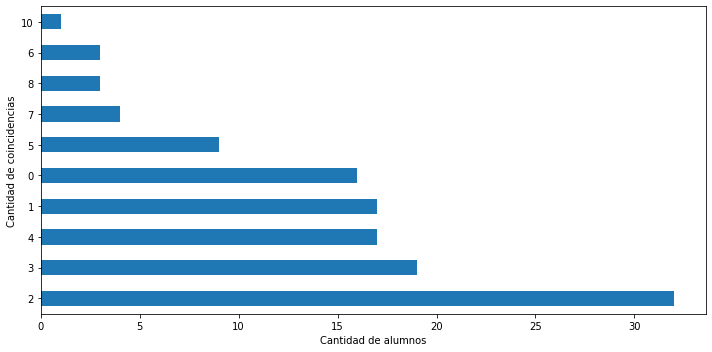

In [180]:
fig,axis = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
df3['Nota'].value_counts(ascending=True).plot(kind='barh',ax=axis)
axis.invert_yaxis()
axis.set_xlabel("Cantidad de alumnos")
axis.set_ylabel("Cantidad de coincidencias")

fig.tight_layout()

#  Poner la nota

In [181]:
df4=df3

In [182]:
# Si tiene más de 5 palabras que coincidan aprueban

df4['Nota'] = df4['Nota'].apply(lambda x: 'Aprobado' if x > 4 else 'Desaprobado' )


In [183]:
df4.head(20)

,padrón,Nota
0,100723,Aprobado
1,97739,Desaprobado
2,97920,Desaprobado
3,102908,Desaprobado
4,100586,Desaprobado
5,97920,Desaprobado
6,102309,Aprobado
7,102120,Desaprobado
8,101100,Desaprobado
9,103803,Aprobado


In [184]:
df4.groupby('Nota')['Nota'].count().sort_values(ascending=False)

Nota
Desaprobado    101
Aprobado        20
Name: Nota, dtype: int64

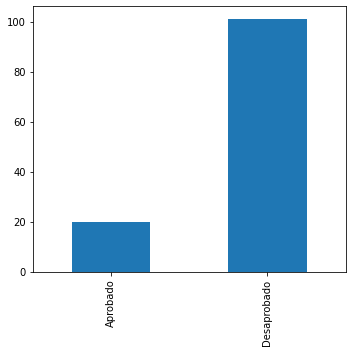

In [185]:
fig,axis = plt.subplots(nrows=1,ncols=1, figsize=(5,5))
df4['Nota'].value_counts(ascending=True).plot(kind='bar',ax=axis)

fig.tight_layout()

In [192]:
round(20/121 * 100,2)
#Aprobados

16.53